# Filter probe pairs that have strong interactions

Before running this notebook, please install BLAST locally on your computer following instructions from NCBI: https://www.ncbi.nlm.nih.gov/books/NBK569861/

The BLAST+ executables are listed on https://ftp.ncbi.nlm.nih.gov/blast/executables/blast+/LATEST/

This notebook takes in a probe fasta file (see also how the fasta file can be created in the 2nd structure filtering pipeline), and output the smallest subset of probes that need to be discarded.

### 1. Check if BLAST is successfully installed locally

In [14]:
! ls /usr/local/ncbi/blast/bin

blast_formatter            get_species_taxids.sh
blast_formatter_vdb        legacy_blast.pl
blast_vdb_cmd              makeblastdb
blastdb_aliastool          makembindex
blastdbcheck               makeprofiledb
blastdbcmd                 psiblast
blastn                     rpsblast
blastn_vdb                 rpstblastn
blastp                     segmasker
blastx                     tblastn
cleanup-blastdb-volumes.py tblastn_vdb
convert2blastmask          tblastx
deltablast                 update_blastdb.pl
dustmasker                 windowmasker


In [16]:
! makeblastdb -help

USAGE
  makeblastdb [-h] [-help] [-in input_file] [-input_type type]
    -dbtype molecule_type [-title database_title] [-parse_seqids]
    [-hash_index] [-mask_data mask_data_files] [-mask_id mask_algo_ids]
    [-mask_desc mask_algo_descriptions] [-gi_mask]
    [-gi_mask_name gi_based_mask_names] [-out database_name]
    [-blastdb_version version] [-max_file_sz number_of_bytes]
    [-metadata_output_prefix ] [-logfile File_Name] [-taxid TaxID]
    [-taxid_map TaxIDMapFile] [-oid_masks oid_masks] [-version]

DESCRIPTION
   Application to create BLAST databases, version 2.16.0+

REQUIRED ARGUMENTS
 -dbtype <String, `nucl', `prot'>
   Molecule type of target db

OPTIONAL ARGUMENTS
 -h
   Print USAGE and DESCRIPTION;  ignore all other parameters
 -help
   Print USAGE, DESCRIPTION and ARGUMENTS; ignore all other parameters
 -version
   Print version number;  ignore other arguments

 *** Input options
 -in <File_In>
   Input file/database name
   Default = `-'
 -input_type <String, `asn1_bin

In [18]:
! blastn -help

USAGE
  blastn [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-negative_seqidlist filename]
    [-taxids taxids] [-negative_taxids taxids] [-taxidlist filename]
    [-negative_taxidlist filename] [-no_taxid_expansion]
    [-entrez_query entrez_query] [-db_soft_mask filtering_algorithm]
    [-db_hard_mask filtering_algorithm] [-subject subject_input_file]
    [-subject_loc range] [-query input_file] [-out output_file]
    [-evalue evalue] [-word_size int_value] [-gapopen open_penalty]
    [-gapextend extend_penalty] [-perc_identity float_value]
    [-qcov_hsp_perc float_value] [-max_hsps int_value]
    [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value] [-penalty penalty]
    [-reward reward] [-no_greedy] [-min_raw_gapped_score int_value]
    [-template_ty

### 2. Explore probes that form heterodimers using the mSpleen_64_gene probes as an example

Make a BLAST database using all the probe sequences.

In [22]:
! makeblastdb -in ../2nd_structure/Spleen_64_gene.fasta -dbtype nucl -out spleen



Building a new DB, current time: 06/16/2025 13:51:30
New DB name:   /Users/jtian/Documents/Probe_filtering/Probe_filtering_pipeline/probe_interaction/spleen
New DB title:  ../2nd_structure/Spleen_64_gene.fasta
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /Users/jtian/Documents/Probe_filtering/Probe_filtering_pipeline/probe_interaction/spleen
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 752 sequences in 0.00655198 seconds.




BLAST each probe against the database using blastn-short (choose the minus strand).

In [35]:
! blastn -task blastn-short -db spleen -query ../2nd_structure/Spleen_64_gene.fasta -strand minus -evalue 0.05 -outfmt 6

Cd3e_pri_6	Il7r_pri_2	100.000	12	0	0	17	28	20	9	0.028	24.3
Tcf7_pri_1	Xcr1_pad_1	100.000	12	0	0	1	12	17	6	0.028	24.3
Lyl1_pri_6	Cd22_pri_3	100.000	12	0	0	1	12	18	7	0.034	24.3
Lmo2_pri_6	Cd83_pri_2	100.000	13	0	0	4	16	18	6	0.008	26.3
Meis1_pri_2	Ifng_pad_1	100.000	12	0	0	12	23	15	4	0.029	24.3
Foxp3_pri_2	Cd79a_pad_2	100.000	12	0	0	3	14	21	10	0.028	24.3
Adgre1_pri_5	H2-Aa_pad_2	100.000	12	0	0	20	31	34	23	0.034	24.3
Adgre1_pri_5	Cd79a_pad_5	100.000	12	0	0	20	31	33	22	0.034	24.3
Adgre1_pri_5	Bcl11b_pad_2	100.000	12	0	0	20	31	32	21	0.034	24.3
Cd68_pri_1	Cd68_pri_1	100.000	16	0	0	13	28	28	13	1.15e-04	32.2
Itgax_pri_5	Itgax_pri_5	100.000	14	0	0	5	18	18	5	0.002	28.2
Itgam_pri_1	Tcf3_pad_3	100.000	12	0	0	11	22	21	10	0.029	24.3
Cd22_pri_3	Lyl1_pri_6	100.000	12	0	0	7	18	12	1	0.029	24.3
Cd22_pri_6	Cd22_pad_2	100.000	12	0	0	14	25	12	1	0.028	24.3
Il7r_pri_2	Cd3e_pri_6	100.000	12	0	0	9	20	28	17	0.035	24.3
Xcr1_pri_1	Ccr4_pri_2	100.000	12	0	0	19	30	31	20	0.031	24.3
Irf8_pri_4	Cd86_pri_3	100.000	12	0	0

outfmt 6 lists everything in this order: 'query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score'

Note: you may need to try different evalue thresholds to filter out unwanted probe interactions. Higher evalue will return more hits that include weaker probe interactions. Importantly, different sizes of databases will have different optimal evalue thresholds. A rule of thumb is to filter out probe interactions pair with a bit score higher than 24, which corresponds to 12nt consecutive dsDNA formation.

To inspect how individual hits look like, paste your sequence of interest into the Query.fasta file and take a closer look.

In [46]:
# Query= Cd8a_pri_2
! blastn -task blastn-short -db spleen -query Query.fasta -strand minus -evalue 0.05

BLASTN 2.16.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.



Database: ../2nd_structure/Spleen_64_gene.fasta
           752 sequences; 32,833 total letters



Query= Cd8a_pri_2

Length=39
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

Cd8a_pad_3                                                            30.2    6e-04


>Cd8a_pad_3
Length=53

 Score = 30.2 bits (15),  Expect = 6e-04
 Identities = 18/19 (95%), Gaps = 0/19 (0%)
 Strand=Plus/Minus

Query  15  GAAAATGGAGGCCTATTTT  33
           ||||||||| |||||||||
Sbjct  19  GAAAATGGACGCCTATTTT  1



Lambda      K        H
    1.37    0.711     1.31 

Gapped
Lambda      K        H
    1.37    0.711     1.31 



### 3. Filter probes from the mSpleen_64_gene probe library.

Save the BLAST result into spleen.out

In [50]:
! blastn -task blastn-short -db spleen -query ../2nd_structure/Spleen_64_gene.fasta -strand minus -evalue 0.05 -outfmt 6 -out spleen.out

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('spleen.out', sep='\t', header=None)
df.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,Cd3e_pri_6,Il7r_pri_2,100.0,12,0,0,17,28,20,9,0.028,24.3
1,Tcf7_pri_1,Xcr1_pad_1,100.0,12,0,0,1,12,17,6,0.028,24.3
2,Lyl1_pri_6,Cd22_pri_3,100.0,12,0,0,1,12,18,7,0.034,24.3
3,Lmo2_pri_6,Cd83_pri_2,100.0,13,0,0,4,16,18,6,0.008,26.3
4,Meis1_pri_2,Ifng_pad_1,100.0,12,0,0,12,23,15,4,0.029,24.3


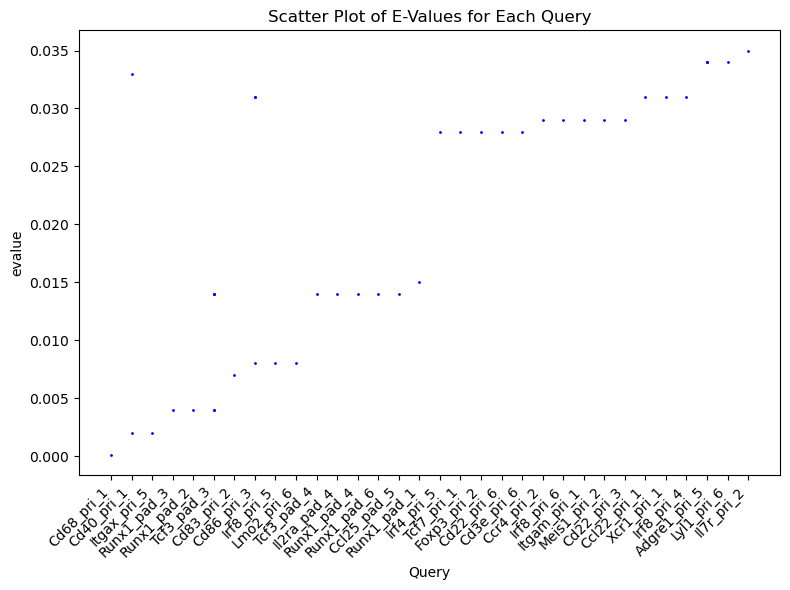

In [80]:
df_sorted = df.sort_values(by='evalue', ascending=True)

plt.figure(figsize=(8, 6))
plt.scatter(df_sorted["query acc.ver"], df_sorted["evalue"], color='blue', s = 1)

plt.xlabel('Query')
plt.ylabel('evalue')
plt.title('Scatter Plot of E-Values for Each Query')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [82]:
df.shape

(41, 12)

In [84]:
df['query acc.ver'].nunique()

32

In this probe set, there are 32 probes in total that are involved in strong interactions. But we don't need to discard all 32 probes. We just have to find the smallest subset of the probes to be discarded that will result in no probe interactions.

Calculate the minimum vertex cover of the graph constructed by query acc.ver and subject acc.ver using an approximation. Note that the exact solution is NP-hard, so the solution here is just an 2-approximation for the minimum vertex cover, meaning that its size is at most twice the size of the optimal cover.

In [88]:
import networkx as nx
# Create an undirected graph from the DataFrame.
G = nx.from_pandas_edgelist(df, source='query acc.ver', target='subject acc.ver')

# Use the weighted vertex cover approximation (works for unweighted graphs too).
vertex_cover = nx.algorithms.approximation.min_weighted_vertex_cover(G)

In [90]:
len(vertex_cover)

20

As we can see, we just need to discard 20 probes to result in a probe-interaction-free probe set.

In [110]:
Probe_to_be_discarded = list(vertex_cover)
Probe_to_be_discarded = pd.DataFrame(Probe_to_be_discarded, columns=['Probe name'])
Probe_to_be_discarded.to_excel('Probe_to_be_discarded.xlsx', index=False)